# Exam Modul 3 EDA and Machine Learning

## Import Library and File

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv("/content/drive/My Drive/Data_Science_Project/exam modul 3/satisfaction.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


## Decribe data (Checking Missing Value and  Unique varible of each columns)
>We could see that this dataset doesn't have missing value in every columns

In [ ]:
satisfactionDesc = []

for i in df.columns:
    satisfactionDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i]).isna().sum())/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = satisfactionDesc, columns = [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
])

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,Unnamed: 0,int64,0,0.0,500,"[241, 347]"
1,emp_id,object,0,0.0,499,"[PUR7748, TECH9838]"
2,age,int64,0,0.0,32,"[45, 41]"
3,Dept,object,0,0.0,5,"[Technology, HR]"
4,location,object,0,0.0,2,"[Suburb, City]"
5,education,object,0,0.0,2,"[PG, UG]"
6,recruitment_type,object,0,0.0,4,"[Referral, Walk-in]"
7,job_level,int64,0,0.0,5,"[1, 2]"
8,rating,int64,0,0.0,5,"[5, 1]"
9,onsite,int64,0,0.0,2,"[1, 0]"


## Background and goals from this dataset

**Background Problem**
>In every single company we know that employees is the biggest asset that company ever had itself, despite the company had an advance , smartest technology , and many more asset that they ever had, but all of they had is useless if they dont have a good, smart, talented employees. In this Exploratory Data Analysis, I have a several question about employees satisfaction.  
1.Did employees level have a big effect of they **satisfaction**?
2. Did employees last rating still have a big effect of they next **satisfaction**? ( example : if one employee gives **bad result**, then the next result will be **good**? or if one employee gives **bad** result in the past then they have a **certification**, **reward** and the **salary** increases could give **good** result in the next ?  
3.Was the **location** of employees have an effect with they **satisfaction**?  
4.Was the **age** of employees could give effect with they **satisfaction**?  

**Goals**
1. Could we predict who is the employee is not **satisfied** based on this dataset?

## Exploratory Data Analysis

### Create Age Classification

In [ ]:
age_min = df['age'].min() ### the lowest age of this dataset
age_max = df['age'].max()
print(f'The Lowest Age of this dataset :{age_min}')
print(f'The Highest Age of this dataset :{age_max}')

The Lowest Age of this dataset :23
The Highest Age of this dataset :54


### Age binning
> We have to give an Age classification based on **Retirement Day**.(56) 
1. More than Equal 30 Years  
2. More than Equal 20 Years  
3. More than Equal 10 Years
4. Less than Equal 10 years

In [ ]:
age_bin = [0,26,36,46,54]
labels = ['More than Equal 30 Years','More than Equal 20 Years','More than Equal 10 Years', 'Less Than Equal 10 years']
df['retirement'] = pd.cut(df['age'],bins =age_bin,labels = labels )

In [ ]:
df.head()

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied,retirement
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1,More than Equal 20 Years
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0,Less Than Equal 10 years
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0,More than Equal 10 Years
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1,More than Equal 10 Years
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1,More than Equal 20 Years


As we See Below, that there is no **outLiers** in this Column (Age)

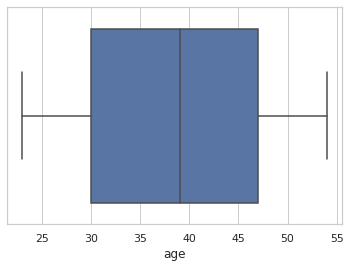

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["age"])

>We got insight that employees who had Retirement days remaining **More than 30 years** is the **lowest** rates of satisfied.  
The **highest** employee was **satisfied** is employees who had Retirement days remaining **more than Equal 20 Years**  
Employees who had Retirement days(56) remaining **More than Equal 30 Years** have a **vast** differences with another **Age classification**

In [ ]:
age = ((df[['retirement','satisfied']].groupby(['retirement']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
age

,satisfied
retirement,
More than Equal 20 Years,57.14
Less Than Equal 10 years,52.38
More than Equal 10 Years,51.90
More than Equal 30 Years,44.93


<BarContainer object of 4 artists>

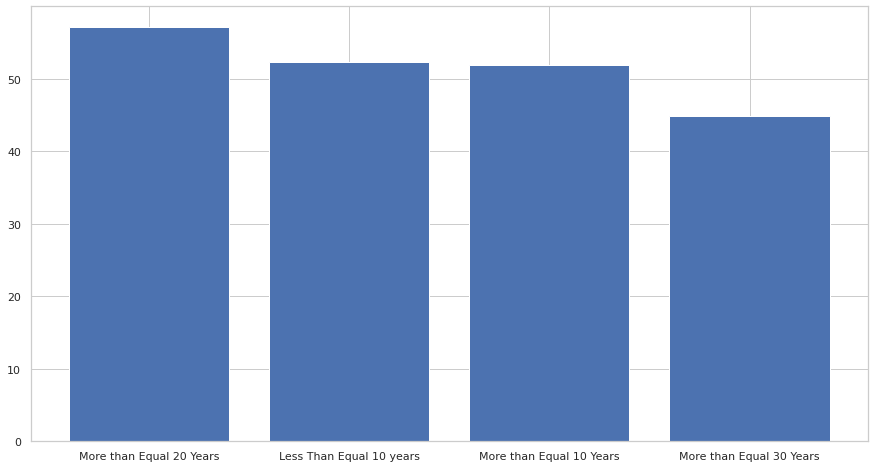

In [ ]:
plt.figure(figsize=(15,8))
plt.bar( age.index.values,age['satisfied'])

### Department

In [ ]:
dept = ((df[['Dept','satisfied']].groupby(['Dept']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
dept

,satisfied
Dept,
Purchasing,56.88
Sales,55.43
Technology,54.08
HR,50.00
Marketing,46.32


We got the insight :  
1. The **lowest** score of satisfied was from **Departement Marketing**  
2. The **Highest** score of satisfied was from **Departemen Purchasing**

<BarContainer object of 5 artists>

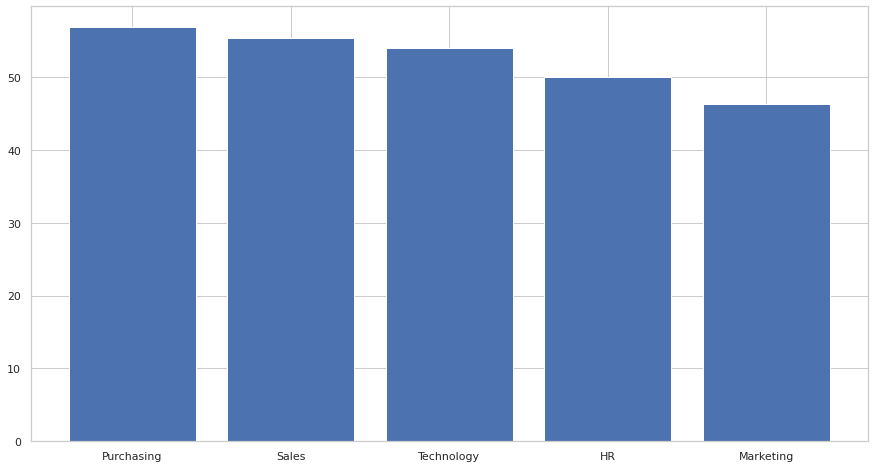

In [ ]:
plt.figure(figsize=(15,8))
plt.bar( dept.index.values,dept['satisfied'])

### Work Location

In [ ]:
loc = ((df[['location','satisfied']].groupby(['location']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
loc

,satisfied
location,
City,54.05
Suburb,51.04


We got the insight :
1. Between Employees who worked in the **City** and **Suburb**, there is no significant differences.

<BarContainer object of 2 artists>

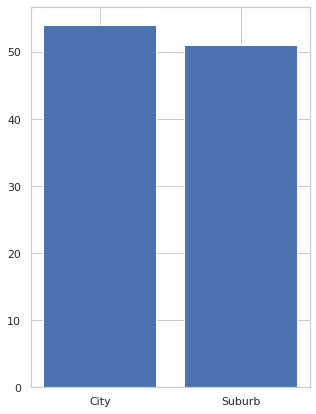

In [ ]:
plt.figure(figsize=(5,7))
plt.bar( loc.index.values,loc['satisfied'])

### Education
> **PG** : Post Graduated  
**UG** : Under Graduated

Both of theese **Education degree** also dont have a vast differences with the satisfaction.

In [ ]:
ed = ((df[['education','satisfied']].groupby(['education']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
ed

,satisfied
education,
PG,53.94
UG,51.22


<BarContainer object of 2 artists>

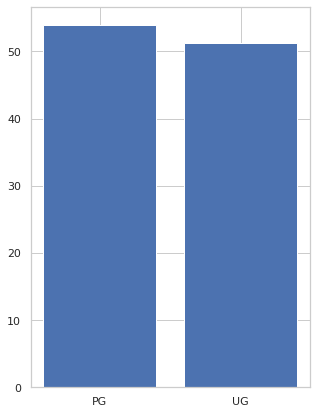

In [ ]:
plt.figure(figsize=(5,7))
plt.bar( ed.index.values,ed['satisfied'])

### Recruitment type
> I assumed that **Employee** was recruited from **Reffral** Have a** high rates** of **satisfied**, but we could see that data said there is no significant differences with **recruitment type**.

In [ ]:
rec = ((df[['recruitment_type','satisfied']].groupby(['recruitment_type']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
rec

,satisfied
recruitment_type,
Recruitment Agency,54.63
On-Campus,54.14
Referral,51.91
Walk-in,50.00


<BarContainer object of 4 artists>

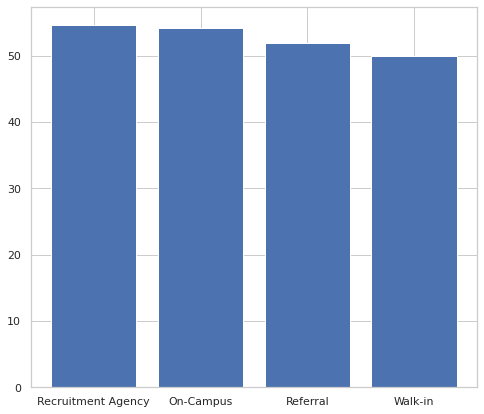

In [ ]:
plt.figure(figsize=(8,7))
plt.bar( rec.index.values,rec['satisfied'])

### Job Level
> We always want to the highest level from our job.  
Is the **highest** level of job gives  a positive corralation with satisfaction?  
We see the anomaly, why **Employees** in **level 2** have the **lowest** rates of **satisfaction**?

In [ ]:
lev = ((df[['job_level','satisfied']].groupby(['job_level']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
lev

,satisfied
job_level,
1,56.84
5,56.31
4,51.82
3,50.00
2,48.18


<BarContainer object of 5 artists>

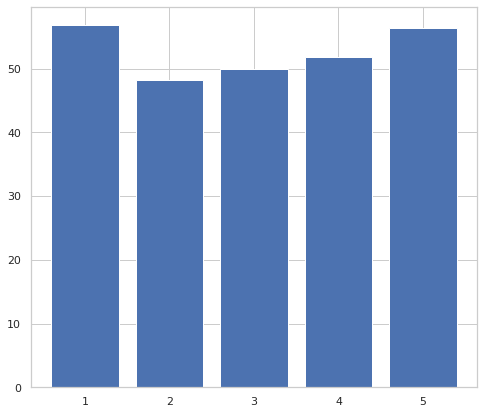

In [ ]:
plt.figure(figsize=(8,7))
plt.bar(lev.index.values,lev['satisfied'])

### Employee Rating
> We expected that the more **rating** of the **employee** gives a **positive** **correlation** with **satisfaction** result, but We see that anomaly again, why **employee** who had a **rating** 3 have a score **lower** than **rating** 2?

In [ ]:
rate = ((df[['rating','satisfied']].groupby(['rating']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
rate

,satisfied
rating,
5,60.38
4,55.75
2,51.52
3,47.13
1,46.32


<BarContainer object of 5 artists>

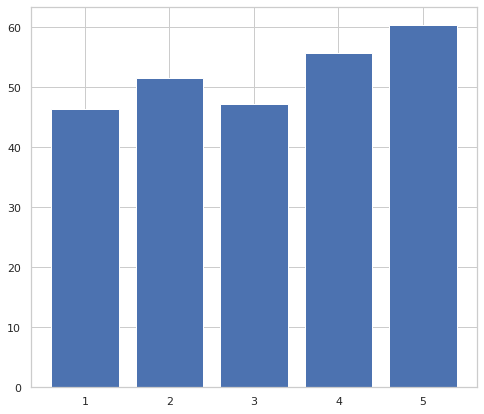

In [ ]:
plt.figure(figsize=(8,7))
plt.bar(rate.index.values,rate['satisfied'])

### On Site

In [ ]:
onsite = ((df[['onsite','satisfied']].groupby(['onsite']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
onsite = onsite.rename(index={0: 'No',1:'Yes'})
onsite

,satisfied
onsite,
Yes,54.08
No,51.31


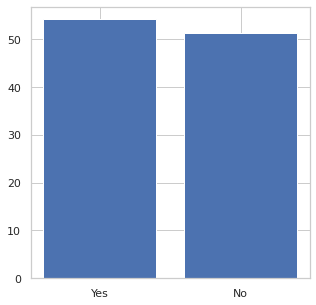

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(onsite.index.values,onsite['satisfied'])
plt.show()

### Award
Award is big achievement for every employee, but why employee who had 0 **awards** is the second **highest** rate of **satisfied**, and employee who had 8 **awards** is the third **lowest** rate of **satisfied**? that is interesting, because there so many factor (features) that could make employee **satisfied** with his job.

In [ ]:
awd = ((df[['awards','satisfied']].groupby(['awards']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
awd

,satisfied
awards,
7,64.00
0,61.54
6,58.70
4,56.86
9,53.19
5,51.92
1,51.22
8,46.43
3,43.86


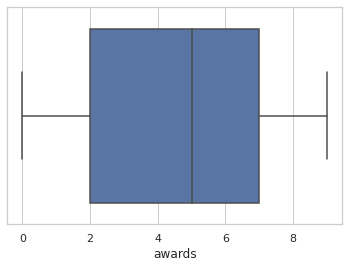

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["awards"])

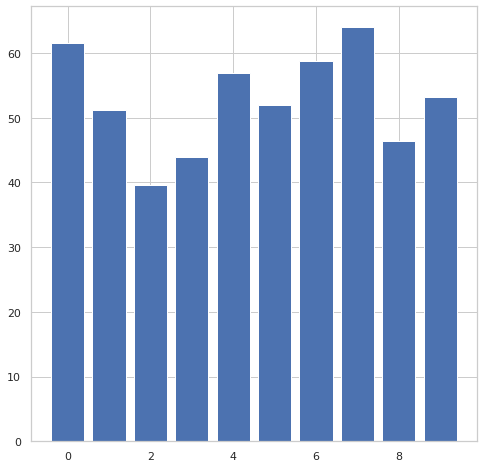

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(awd.index.values,awd['satisfied'])
plt.show()

### Certification
>There is no significant differences rates between Yes or No, Employees who have a certifications.

In [ ]:
cert = ((df[['certifications','satisfied']].groupby(['certifications']).mean())*100).round(2).sort_values(by='satisfied', ascending=False)
cert = cert.rename(index={0: 'No',1:'Yes'})
cert

,satisfied
certifications,
No,53.17
Yes,52.02


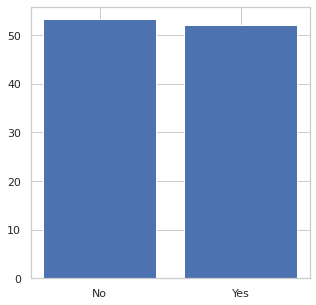

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(cert.index.values,cert['satisfied'])
plt.show()

### Salary
> I divide the salary classification in 3 level  
1. **Low** (24076-45000)
2. **Medium** (45001-66000)
3. **High** (66001-86750)

> We got the insight that** Low-High** had a **positive** **corralation** to Employee **Satisfaction**.

As we see in the **boxplot**, there is no **Outliers** with Employee **Salary**

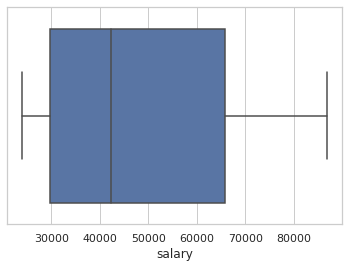

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["salary"])

In [ ]:
sal_min = df['salary'].min() ### the lowest age of this dataset
sal_max = df['salary'].max()
print(f'The Lowest salary of this dataset :{sal_min}')
print(f'The Highest salary of this dataset :{sal_max}')

The Lowest salary of this dataset :24076
The Highest salary of this dataset :86750


In [ ]:
age_bin = [24000,45000,66000,df['salary'].max()]
labels = ['Low','Medium','High']
df['salary_range'] = pd.cut(df['salary'],bins =age_bin,labels = labels )

In [ ]:
salary = ((df[['salary_range','satisfied']].groupby(['salary_range']).mean())*100).round(2).sort_values(by='satisfied', ascending=True)
salary

,satisfied
salary_range,
Low,51.57
Medium,51.82
High,56.31


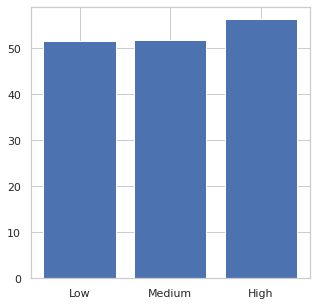

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(salary.index.values,salary['satisfied'])
plt.show()

## Feature Engineering

### One Hot Encoding

#### Departemen

In [ ]:
df = pd.get_dummies(data=df, columns=['Dept'])

In [ ]:
df.head()

,Unnamed: 0,emp_id,age,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied,retirement,salary_range,salary_bin2,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology
0,0,HR8270,28,Suburb,PG,Referral,5,2,0,1,0,86750,1,More than Equal 20 Years,High,2,1,0,0,0,0
1,1,TECH1860,50,Suburb,PG,Walk-in,3,5,1,2,1,42419,0,Less Than Equal 10 years,Low,0,0,0,0,0,1
2,2,TECH6390,43,Suburb,UG,Referral,4,1,0,2,0,65715,0,More than Equal 10 Years,Medium,1,0,0,0,0,1
3,3,SAL6191,44,City,PG,On-Campus,2,3,1,0,0,29805,1,More than Equal 10 Years,Low,0,0,0,0,1,0
4,4,HR6734,33,City,UG,Recruitment Agency,2,1,0,5,0,29805,1,More than Equal 20 Years,Low,0,1,0,0,0,0


#### Recruitment Type

In [ ]:
df = pd.get_dummies(data=df, columns=['recruitment_type'])

In [ ]:
df.head()

,Unnamed: 0,emp_id,age,location,education,job_level,rating,onsite,awards,certifications,salary,satisfied,retirement,salary_range,salary_bin2,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,0,HR8270,28,Suburb,PG,5,2,0,1,0,86750,1,More than Equal 20 Years,High,2,1,0,0,0,0,0,0,1,0
1,1,TECH1860,50,Suburb,PG,3,5,1,2,1,42419,0,Less Than Equal 10 years,Low,0,0,0,0,0,1,0,0,0,1
2,2,TECH6390,43,Suburb,UG,4,1,0,2,0,65715,0,More than Equal 10 Years,Medium,1,0,0,0,0,1,0,0,1,0
3,3,SAL6191,44,City,PG,2,3,1,0,0,29805,1,More than Equal 10 Years,Low,0,0,0,0,1,0,1,0,0,0
4,4,HR6734,33,City,UG,2,1,0,5,0,29805,1,More than Equal 20 Years,Low,0,1,0,0,0,0,0,1,0,0


### Binning

#### Salary

In [ ]:
df['salary_bin']=df['salary_range'].map({
    'Low':0,
    'Medium':1,
    'High':2
})

In [ ]:
gg =df['salary_bin'].astype(int)
df['salary_bin2'] = gg
del df['salary_bin']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        500 non-null    int64   
 1   emp_id            500 non-null    object  
 2   age               500 non-null    int64   
 3   Dept              500 non-null    object  
 4   location          500 non-null    object  
 5   education         500 non-null    object  
 6   recruitment_type  500 non-null    object  
 7   job_level         500 non-null    int64   
 8   rating            500 non-null    int64   
 9   onsite            500 non-null    int64   
 10  awards            500 non-null    int64   
 11  certifications    500 non-null    int64   
 12  salary            500 non-null    int64   
 13  satisfied         500 non-null    int64   
 14  retirement        500 non-null    category
 15  salary_range      500 non-null    category
 16  salary_bin2       500 non-

## Checking Correlation

Every feature have a low coralation to the target (Satisfied)
We will see in the  Machine Learning could predict very well 

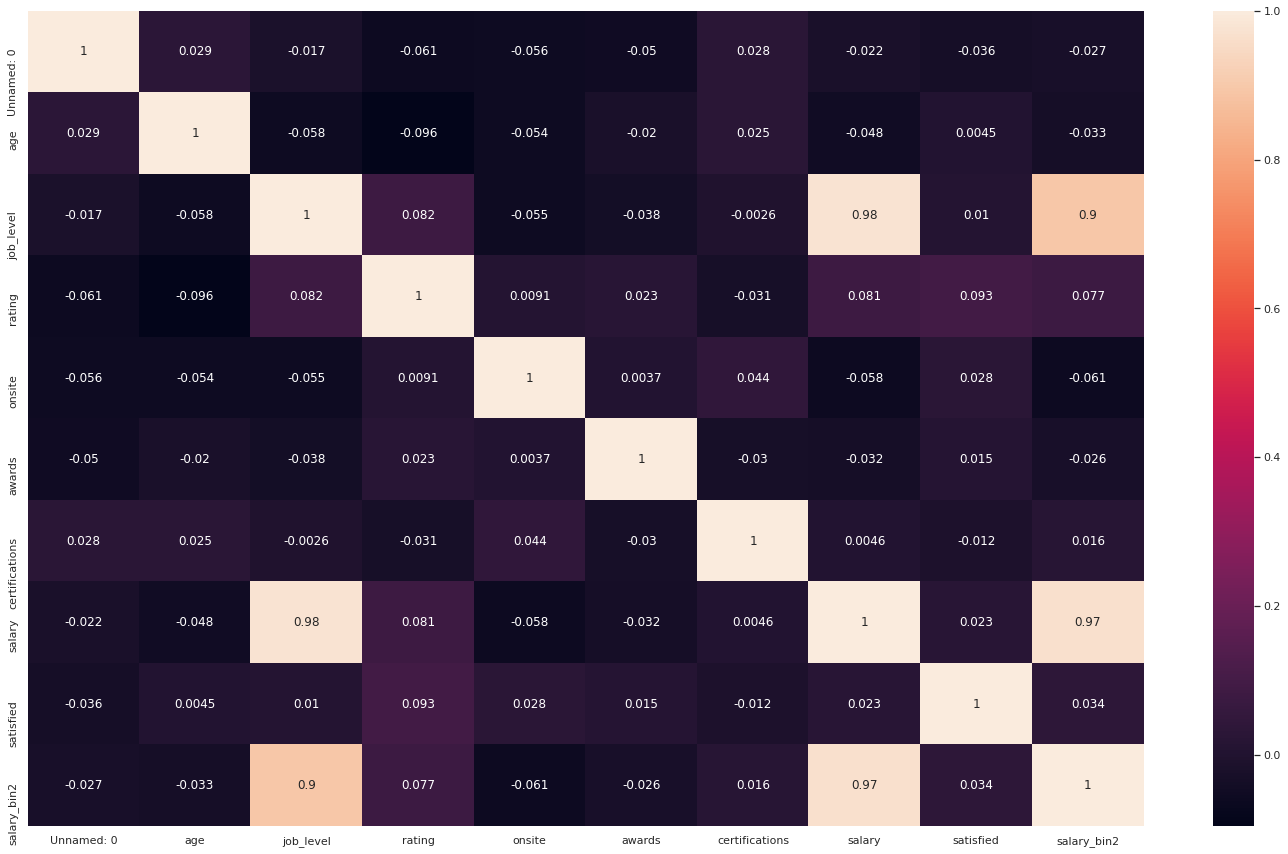

In [ ]:
corr = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)
plt.show()

## Cheking Imbalance Data
>The Data balanced

In [ ]:
(df['satisfied'].value_counts()/len(df)*100).round(2)

1    52.6
0    47.4
Name: satisfied, dtype: float64

##Feature Seletion

In [ ]:
#df['Unnamed: 0']
df.head()

,Unnamed: 0,emp_id,age,location,education,job_level,rating,onsite,awards,certifications,salary,satisfied,retirement,salary_range,salary_bin2,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,0,HR8270,28,Suburb,PG,5,2,0,1,0,86750,1,More than Equal 20 Years,High,2,1,0,0,0,0,0,0,1,0
1,1,TECH1860,50,Suburb,PG,3,5,1,2,1,42419,0,Less Than Equal 10 years,Low,0,0,0,0,0,1,0,0,0,1
2,2,TECH6390,43,Suburb,UG,4,1,0,2,0,65715,0,More than Equal 10 Years,Medium,1,0,0,0,0,1,0,0,1,0
3,3,SAL6191,44,City,PG,2,3,1,0,0,29805,1,More than Equal 10 Years,Low,0,0,0,0,1,0,1,0,0,0
4,4,HR6734,33,City,UG,2,1,0,5,0,29805,1,More than Equal 20 Years,Low,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.drop(columns=['Unnamed: 0','emp_id','location','retirement','salary_range'],inplace=True)
df.drop(columns=['education'],inplace=True)

In [ ]:
df.head()

,age,job_level,rating,onsite,awards,certifications,salary,satisfied,salary_bin2,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,28,5,2,0,1,0,86750,1,2,1,0,0,0,0,0,0,1,0
1,50,3,5,1,2,1,42419,0,0,0,0,0,0,1,0,0,0,1
2,43,4,1,0,2,0,65715,0,1,0,0,0,0,1,0,0,1,0
3,44,2,3,1,0,0,29805,1,0,0,0,0,1,0,1,0,0,0
4,33,2,1,0,5,0,29805,1,0,1,0,0,0,0,0,1,0,0


## Machine Learning Process

### Train test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns='satisfied')
y = df['satisfied'] #kolom target

In [ ]:
X

,age,job_level,rating,onsite,awards,certifications,salary,salary_bin2,Dept_HR,Dept_Marketing,Dept_Purchasing,Dept_Sales,Dept_Technology,recruitment_type_On-Campus,recruitment_type_Recruitment Agency,recruitment_type_Referral,recruitment_type_Walk-in
0,28,5,2,0,1,0,86750,2,1,0,0,0,0,0,0,1,0
1,50,3,5,1,2,1,42419,0,0,0,0,0,1,0,0,0,1
2,43,4,1,0,2,0,65715,1,0,0,0,0,1,0,0,1,0
3,44,2,3,1,0,0,29805,0,0,0,0,1,0,1,0,0,0
4,33,2,1,0,5,0,29805,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,2,5,0,6,0,29805,0,1,0,0,0,0,1,0,0,0
496,24,2,4,0,2,0,29805,0,0,0,0,0,1,0,0,1,0
497,34,1,3,0,2,0,24076,0,0,1,0,0,0,1,0,0,0
498,26,2,1,1,1,1,29805,0,0,0,0,0,1,1,0,0,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = .8, stratify = y,random_state =42)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelLog=LogisticRegression()
modelLog.fit(X_train,y_train)
modelLog.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score,f1_score,accuracy_score,precision_score,roc_auc_score

In [ ]:
y_pred = modelLog.predict(X_test)

In [ ]:
print("Train Accuracy:",modelLog.score(X_train, y_train).round(2))
print("Test Accuracy:",modelLog.score(X_test, y_test).round(2))

Train Accuracy: 0.52
Test Accuracy: 0.53


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.53      1.00      0.69        53

    accuracy                           0.53       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.28      0.53      0.37       100



> This classification report, is Recall higher than precision, which mean this is bad result because we want to focus on precision

### SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel='linear',max_iter=300, random_state = 0) #max iter --> makin besar nilainya makin lama
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=300, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the Test set results
y_SVC = classifier.predict(X_test)

In [ ]:
print("Train Accuracy:",classifier.score(X_train, y_train).round(2))
print("Test Accuracy:",classifier.score(X_test, y_test).round(2))

Train Accuracy: 0.48
Test Accuracy: 0.54


In [ ]:
print(classification_report(y_test,y_SVC))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        47
           1       0.57      0.55      0.56        53

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



> This classification report, is Precision higher than recall, which mean this is **BEST** result because we want to focus on precision

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=10, random_state=42,min_samples_split=90,min_samples_leaf=70) #12 best so far
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=90,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_rf = rf.predict(X_test)

In [ ]:
print("Train Accuracy:",rf.score(X_train, y_train).round(2))
print("Test Accuracy:",rf.score(X_test, y_test).round(2))

Train Accuracy: 0.56
Test Accuracy: 0.5


In [ ]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.41      0.15      0.22        47
           1       0.52      0.81      0.63        53

    accuracy                           0.50       100
   macro avg       0.46      0.48      0.43       100
weighted avg       0.47      0.50      0.44       100



### XGB

This algorithms is not good for our model, because the result is **overfitting**

Test Score (0.51) is worse than Train Score (1)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth=15) 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_xgb = xgb.predict(X_test)

In [ ]:
print("Train Accuracy:",xgb.score(X_train, y_train).round(2))
print("Test Accuracy:",xgb.score(X_test, y_test).round(2))

Train Accuracy: 1.0
Test Accuracy: 0.51


In [ ]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.48      0.55      0.51        47
           1       0.54      0.47      0.51        53

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100



### Hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

#### SVC

In [ ]:
modelSVC = SVC()
param_svc = {"max_iter" : [800,1600,2400,3200],
             "kernel":['linear','sigmoid','rbf','polynomial'],
             "random_state":[42]}

In [ ]:
hyper_svc = GridSearchCV(estimator=modelSVC, param_grid=param_svc, n_jobs = -1, cv = 5, verbose=1 )

In [ ]:
hyper_svc.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'kernel': ['linear', 'sigmoid', 'rbf', 'polynomial'],
                         'max_iter': [800, 1600, 2400, 3200],
                         'random_state': [42]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
hyper_svc.best_params_

{'kernel': 'linear', 'max_iter': 800, 'random_state': 42}

In [ ]:
hyper_svc.best_score_

0.5225000000000001

In [ ]:
hyper_svc.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=800, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_Tuned = hyper_svc.best_estimator_

In [ ]:
y_tunedSVC = svc_Tuned.predict(X_test)

In [ ]:
print("Train Accuracy:",hyper_svc.score(X_train, y_train).round(2))
print("Test Accuracy:",hyper_svc.score(X_test, y_test).round(2))

Train Accuracy: 0.48
Test Accuracy: 0.54


In [ ]:
print(classification_report(y_test,y_tunedSVC))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        47
           1       0.57      0.55      0.56        53

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



#### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
modelKNN = KNeighborsClassifier()
param_KNN = {"n_neighbors" : [5, 10, 15, 20,25,30,35,40],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

In [ ]:
hyper_KNN = GridSearchCV(estimator=modelKNN, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )

In [ ]:
hyper_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
hyper_KNN.best_params_

{'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}

In [ ]:
hyper_KNN.best_score_

0.5075000000000001

In [ ]:
hyper_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [ ]:
KNN_Tuned = hyper_KNN.best_estimator_

In [ ]:
y_tunedKNN = KNN_Tuned.predict(X_test)

In [ ]:
print("Train Accuracy:",hyper_KNN.score(X_train, y_train).round(2))
print("Test Accuracy:",hyper_KNN.score(X_test, y_test).round(2))

Train Accuracy: 0.57
Test Accuracy: 0.51


In [ ]:
print(classification_report(y_test,y_tunedKNN))

              precision    recall  f1-score   support

           0       0.46      0.23      0.31        47
           1       0.53      0.75      0.62        53

    accuracy                           0.51       100
   macro avg       0.49      0.49      0.47       100
weighted avg       0.49      0.51      0.47       100



#### Random Forest

In [ ]:
modelRF = RandomForestClassifier()
param_RF = {"n_estimators" : [100,200,300,400,500,600,700],
            "max_depth" : [10,20,30,40,50,60,70],
            "min_samples_split" : [10,20,30,40,50,60,70],
            "min_samples_split" :[10,20,30,40,50,60,70]}

In [ ]:
hyper_rf = GridSearchCV(estimator=modelRF, param_grid=param_RF, n_jobs = -1, cv = 5, verbose=1 )

In [ ]:
hyper_rf.fit(X_train, y_train)

Fitting 5 folds for each of 343 candidates, totalling 1715 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1715 out of 1715 | elapsed: 13.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
hyper_rf.best_params_

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 400}

In [ ]:
hyper_rf.best_score_

0.515

In [ ]:
hyper_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_Tuned = hyper_rf.best_estimator_

In [ ]:
y_tunedRF = RF_Tuned.predict(X_test)

In [ ]:
print(classification_report(y_test,y_tunedRF))

              precision    recall  f1-score   support

           0       0.48      0.45      0.46        47
           1       0.54      0.57      0.55        53

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100



## FINAL DECISION

I choose **SVC** as the best model machine Learning, because I would like to focus on **Precision**

In [ ]:
print("Train Accuracy:",hyper_svc.score(X_train, y_train).round(2))
print("Test Accuracy:",hyper_svc.score(X_test, y_test).round(2))

Train Accuracy: 0.48
Test Accuracy: 0.54


In [ ]:
print(classification_report(y_test,y_tunedSVC))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52        47
           1       0.57      0.55      0.56        53

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100



In [ ]:
cm_svc = confusion_matrix(y_test,y_SVC, labels=[1,0])

In [ ]:
cm_svc_ = pd.DataFrame(data=cm_svc,columns = ['Pred 1','Pred 0'], index = ['Akt 1','Akt 0'])
cm_svc_

,Pred 1,Pred 0
Akt 1,29,24
Akt 0,22,25


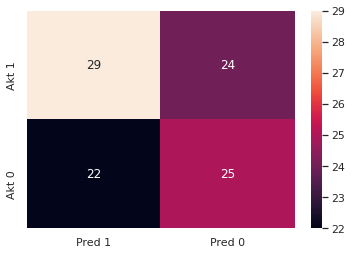

In [ ]:
sns.heatmap(cm_svc_, annot=True)
plt.show()

>From 3 algoritms of machine learning, I decide to choose **SVC** is the best alorithms in this case because we want to focus in Precision
My target is to decrease the **False Positive** (AKT 0,PRED 1 =22)  as lower as possible
Because **False Positive** is We predict who is the employee is **SATISFIED** and actually **NOT SATISFIED** 

so I trade off my **Recall** to **Precission** -->False Negative (AKT 1 , PRED 0=24)

I prefer to choose **Precission** because in this case 

We want to know who is the employee is NOT **SATISFIED** (AKT 0 PRED 0 =25)



## Conclusion and Suggestion(RESULT)

From this model we could predict who is the employee is **not satisfied** and **who is satisfied** based on his salary, departement,age,recruitment type, employee rating, job level, and award.

we have to improve the feature (such as working time and duration of work ) because 3 alorithms couldn't give the more best result as we expected(more **Precision** Score), we see before that the coralation have a very low score (0-(+1) or 0 - (-1)) and **SVC** algorithms is the best score to improve our model.

I know this Model still weak to predict **Who is employee is not satisfied.**